In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import matplotlib.pylab  as  ptr 
import matplotlib as mpl
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from tabulate import tabulate

In [28]:
pf = pd.read_csv('../Documents/framingham.csv')

In [29]:
pf.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [30]:
pf[['BMI','TenYearCHD']].head()

,BMI,TenYearCHD
0,26.97,0
1,28.73,0
2,25.34,0
3,28.58,1
4,23.10,0


<Axes: xlabel='BMI', ylabel='TenYearCHD'>

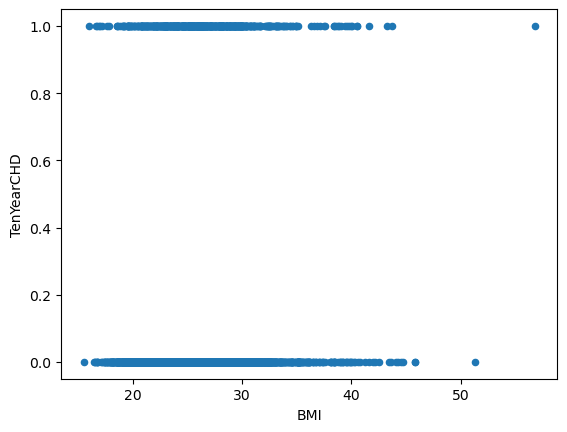

In [31]:
pf[['BMI','TenYearCHD']].plot.scatter(x='BMI',y='TenYearCHD')

In [32]:
# pruebas de parametro
w = 0.09
b = -3.6

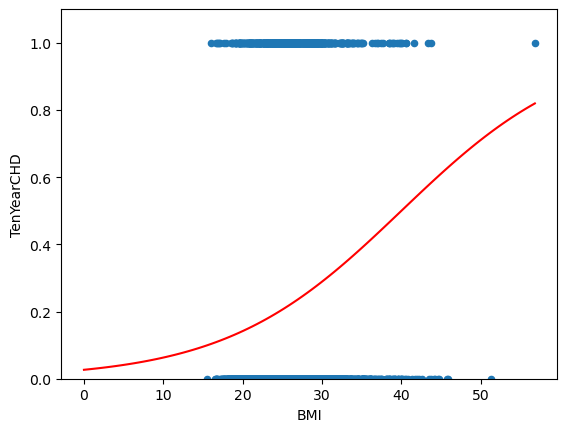

In [33]:
# puntos de la recta
x = np.linspace(0,pf['BMI'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
pf.plot.scatter(x='BMI',y='TenYearCHD')
plt.plot(x, y, '-r')
plt.ylim(0,pf['TenYearCHD'].max()*1.1)
# plt.grid()
plt.show()

In [50]:
# calculo de las predicciones
pf['sigmoid'] = 1/(1+np.exp(-(pf['BMI']*w+b)))

# calculo de la funcion de error
pf['loss_xi'] = -pf['TenYearCHD']*np.log(pf['sigmoid'])-(1-pf['TenYearCHD'])*np.log(1-pf['sigmoid'])
cost_j = pf['loss_xi'].mean()
cost_j

0.44008411803436526

In [51]:
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [36]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [52]:
def sum_error_df(df):
    pf['sigmoid'] = 1/(1+np.exp(-(pf['BMI']*df['w']+df['b'])))
    pf['loss_xi'] = -pf['TenYearCHD']*np.log(pf['sigmoid'])-(1-pf['TenYearCHD'])*np.log(1-pf['sigmoid'])
    j_cost = pf['loss_xi'].mean()
    return(j_cost)

In [38]:
df['error'] = df.apply(sum_error_df, axis=1)

In [39]:
df.sort_values(by=['error']).head()

,w,b,error
96,0.05,-3.04,0.420476
97,0.05,-3.03,0.420479
95,0.05,-3.05,0.420486
98,0.05,-3.02,0.420495
94,0.05,-3.06,0.420508


In [40]:
df_3d = df.pivot(index='w', columns='b', values='error')
df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,0.467470,0.466605,0.465747,0.464894,0.464048,0.463207,0.462373,0.461545,0.460723,0.459908,...,0.420722,0.420650,0.420591,0.420543,0.420508,0.420486,0.420476,0.420479,0.420495,0.420523
0.06,0.446864,0.446178,0.445498,0.444827,0.444163,0.443507,0.442858,0.442217,0.441584,0.440959,...,0.423326,0.423606,0.423901,0.424211,0.424535,0.424875,0.425229,0.425598,0.425982,0.426382
0.07,0.431712,0.431247,0.430792,0.430346,0.429910,0.429483,0.429065,0.428657,0.428259,0.427871,...,0.436300,0.436995,0.437707,0.438436,0.439182,0.439945,0.440726,0.441524,0.442340,0.443173
0.08,0.423333,0.423142,0.422962,0.422793,0.422635,0.422490,0.422355,0.422233,0.422122,0.422023,...,0.461306,0.462477,0.463666,0.464876,0.466104,0.467352,0.468619,0.469906,0.471213,0.472539
0.09,0.423206,0.423344,0.423496,0.423661,0.423839,0.424031,0.424238,0.424457,0.424691,0.424939,...,0.499869,0.501569,0.503291,0.505034,0.506798,0.508583,0.510390,0.512219,0.514069,0.515940


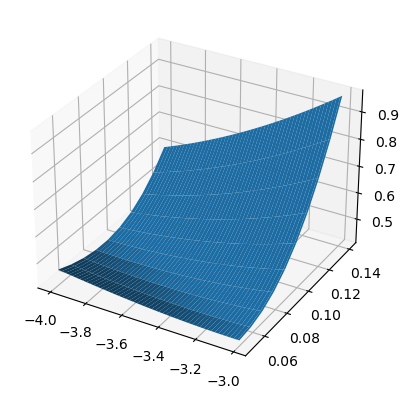

In [41]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

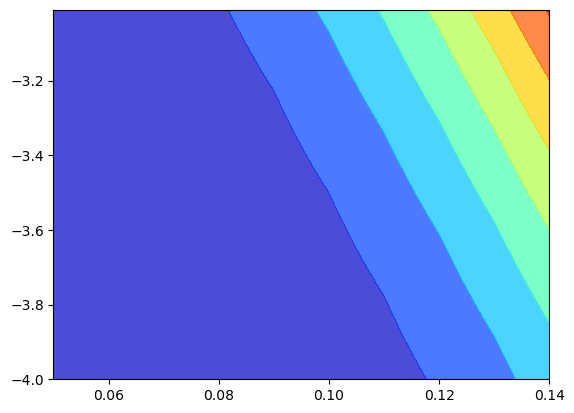

In [42]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)

In [48]:
from sklearn.linear_model import LogisticRegression

# definiendo input y output
X_train = np.array(pf['BMI']).reshape((-1, 1))
Y_train = np.array(pf['TenYearCHD'])

# creando modelo
model = LogisticRegression()
model.fit(X_train, Y_train)

# imprimiendo parametros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values